                                                                                                    Michael Gonzalez
                                                                                                    Summer 2019
                                                                                                    DSC 530

# DSC530 Final Term Project

In [146]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import random
import thinkstats2
import thinkplot
import scipy.stats
import seaborn

## Import and Examine 1980's Boston Housing Data

This will read from the CSV file into the pandas dataframe. It will show the top and bottom 10 rows of the housing dataframe. 

In [147]:
housing = pd.read_csv('80strain.csv')

In [148]:
housing.head(10)

,ID,crimerate,pctbiglots,pctindustrialized,riverboolean,pollution,roomsperhouse,pctbuiltbefore1940,distancetowork,highwayaccess,proptaxper10k,puilteachratio,black,lowerstatuspop,medianvalue
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [149]:
housing.tail(10)

,ID,crimerate,pctbiglots,pctindustrialized,riverboolean,pollution,roomsperhouse,pctbuiltbefore1940,distancetowork,highwayaccess,proptaxper10k,puilteachratio,black,lowerstatuspop,medianvalue
323,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
324,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
325,493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
326,494,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
327,498,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [150]:
housing.describe()

,ID,crimerate,pctbiglots,pctindustrialized,riverboolean,pollution,roomsperhouse,pctbuiltbefore1940,distancetowork,highwayaccess,proptaxper10k,puilteachratio,black,lowerstatuspop,medianvalue
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## Histograms

Going with the median home value and 4 other variables that have a  good correlation relationship with each other.

Text(0.5, 1.0, 'Median Value (In Thousands)')

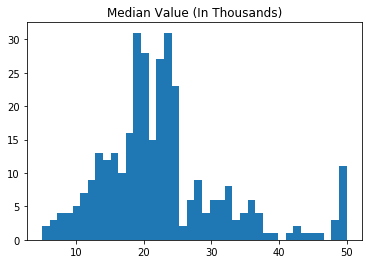

In [151]:
matplotlib.pyplot.hist(housing.medianvalue, bins = 40)
matplotlib.pyplot.title("Median Value (In Thousands)")

Text(0.5, 1.0, 'Lower Status of Population')

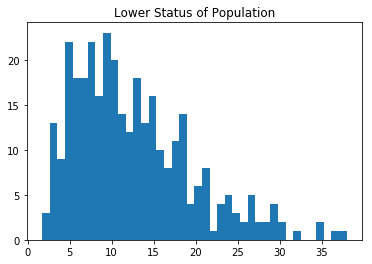

In [152]:
matplotlib.pyplot.hist(housing.lowerstatuspop, bins = 40)
matplotlib.pyplot.title("Lower Status of Population")

Text(0.5, 1.0, 'Bedrooms Per House')

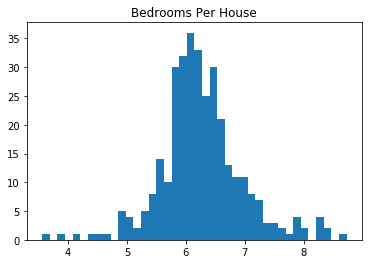

In [153]:
matplotlib.pyplot.hist(housing.roomsperhouse, bins = 40)
matplotlib.pyplot.title("Bedrooms Per House")

Text(0.5, 1.0, 'Students to Teacher Ratio')

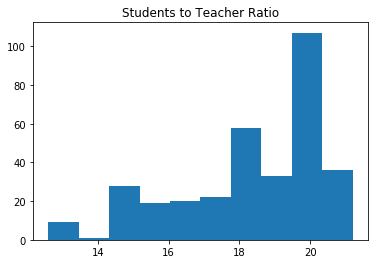

In [154]:
matplotlib.pyplot.hist(housing.puilteachratio, bins = 10)
matplotlib.pyplot.title("Students to Teacher Ratio")

Text(0.5, 1.0, 'Percent Industrialized')

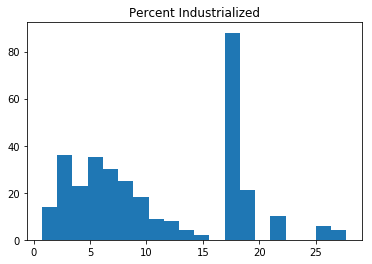

In [155]:
matplotlib.pyplot.hist(housing.pctindustrialized, bins = 20)
matplotlib.pyplot.title("Percent Industrialized")

## Correlation Testing Between The Variables

I wanted to see the strength of relationships between the variables in the data set.

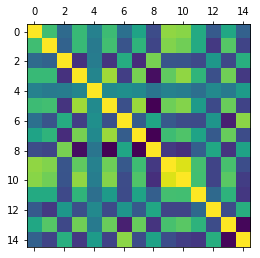

In [156]:
matplotlib.pyplot.matshow(housing.corr())

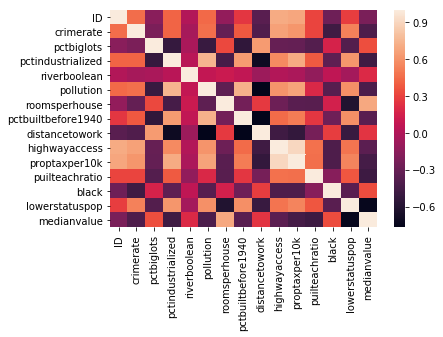

In [157]:
corr = housing.corr()
seaborn.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

In [158]:
corr

,ID,crimerate,pctbiglots,pctindustrialized,riverboolean,pollution,roomsperhouse,pctbuiltbefore1940,distancetowork,highwayaccess,proptaxper10k,puilteachratio,black,lowerstatuspop,medianvalue
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crimerate,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
pctbiglots,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
pctindustrialized,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
riverboolean,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
pollution,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
roomsperhouse,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
pctbuiltbefore1940,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
distancetowork,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
highwayaccess,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


After looking at the correlation, I moved to the next step, which is to compute the confidence interval.

## Probability Mass Function

Performing a Probability Mass Function to compare the two slices of the data set.

In [159]:
#I am slicing the lowerstatus pop variable into two sets based on the percent of lower status pop at ten percent.
pmf_lowerstatus = housing.medianvalue[housing['lowerstatuspop'] >= 10]
pmf_higherstatus = housing.medianvalue[housing['lowerstatuspop'] < 10]

pmf_lowerstatus = pmf_lowerstatus.astype(float)

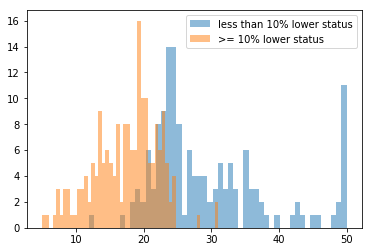

In [160]:
bins = 50

matplotlib.pyplot.hist(pmf_higherstatus, bins, alpha = 0.5, label = 'less than 10% lower status')
matplotlib.pyplot.hist(pmf_lowerstatus, bins, alpha = 0.5, label = '>= 10% lower status')
matplotlib.pyplot.legend(loc = 'upper right')
matplotlib.pyplot.show()

## Cumulative Distribution Function

A CDF of the student to teacher ratio.

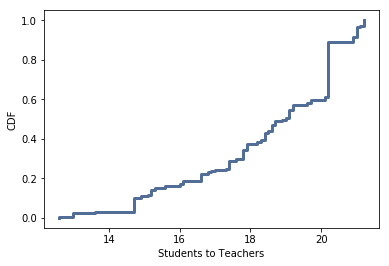

<Figure size 576x432 with 0 Axes>

In [161]:
cdf = thinkstats2.Cdf(housing.puilteachratio)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Students to Teachers', ylabel = 'CDF')

## Analytical Distribution

Looking at the bedrooms per house with the normal probability plot.


In [162]:
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    xs = -2, 2
    fxs, fys = thinkstats2.FitLine(xs, inter = mean, slope = std)
    thinkplot.Plot(fxs, fys, color = 'black', label = 'model')
    xs,ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs,ys, label = 'Bedrooms per House')

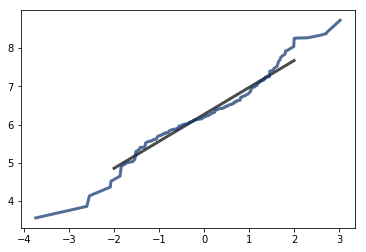

In [163]:
MakeNormalPlot(housing.roomsperhouse)

## Scatter Plots

Looking at the Relationship between 2 variables that includes the median value, lower status population, rooms per house, pupils to teacher and industrialized. 

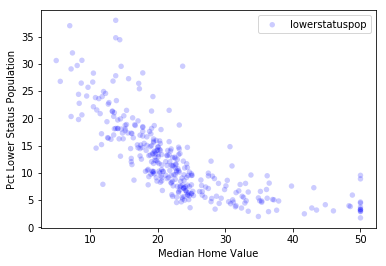

<Figure size 576x432 with 0 Axes>

In [164]:
thinkplot.Scatter(housing.medianvalue, housing.lowerstatuspop)
thinkplot.Show(xlabel = 'Median Home Value', ylabel = 'Pct Lower Status Population')

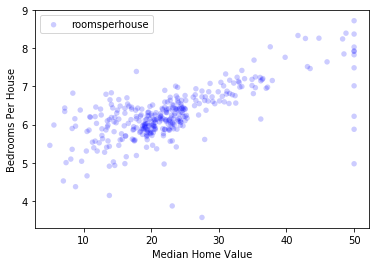

<Figure size 576x432 with 0 Axes>

In [165]:
thinkplot.Scatter(housing.medianvalue, housing.roomsperhouse)
thinkplot.Show(xlabel = 'Median Home Value', ylabel = 'Bedrooms Per House')

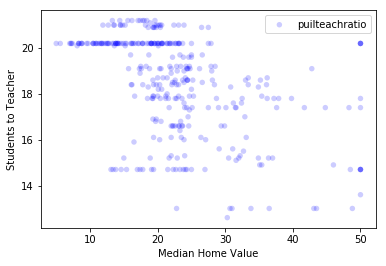

<Figure size 576x432 with 0 Axes>

In [166]:
thinkplot.Scatter(housing.medianvalue, housing.puilteachratio)
thinkplot.Show(xlabel = 'Median Home Value', ylabel = 'Students to Teacher')

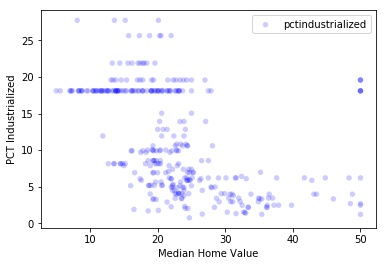

<Figure size 576x432 with 0 Axes>

In [167]:
thinkplot.Scatter(housing.medianvalue, housing.pctindustrialized)
thinkplot.Show(xlabel = 'Median Home Value', ylabel = 'PCT Industrialized')

## Hypothesis Testing 

Correlation Test Hypothesis

In [168]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys


In [169]:
#I will split the data into two columns that I want to test for this hypothesis.
data = housing.medianvalue.values, housing.lowerstatuspop.values

ht = CorrelationPermute(data)
ht.PValue()


0.0

## Regression Analysis

This regression analysis will use the median value variable to predict. I will use the rooms per house, lower status pop, pupils to teacher ratio and industrialized as exploratory variables.

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = housing['medianvalue'] #The median value is used for predicting.
x = housing[['roomsperhouse', 'lowerstatuspop', 'puilteachratio', 'pctindustrialized']] #These are the explanatory variables.

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0) #We are splitting the data 80/20.

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Then we will make a column called coefficient and look at the coefficients of the exploratory variables.

In [172]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns = ['Coefficient'])  
coeff_df  

,Coefficient
roomsperhouse,3.790591
lowerstatuspop,-0.661859
puilteachratio,-0.773254
pctindustrialized,0.071634
